<a href="https://colab.research.google.com/github/Afrian0110/UAS-Sistem-Informasi-Geografis/blob/main/UAS_Sistem_Informasi_Geografis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Flood Risk Prediction Using Random Forest + GIS Data (Dummy Example)

# Step 1: Install Required Libraries
!pip install geopandas rasterio folium scikit-learn matplotlib shapely --quiet

# Step 2: Import Libraries
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 3: Create Dummy GeoSpatial Data
np.random.seed(42)
n_samples = 500
latitudes = np.random.uniform(low=-7.9, high=-7.5, size=n_samples)
longitudes = np.random.uniform(low=110.2, high=110.6, size=n_samples)
coords = [Point(lon, lat) for lon, lat in zip(longitudes, latitudes)]
rainfall = np.random.uniform(50, 300, size=n_samples)
slope = np.random.uniform(0, 45, size=n_samples)
elevation = np.random.uniform(5, 200, size=n_samples)
land_use = np.random.choice([0, 1, 2], size=n_samples)
labels = ((rainfall > 200) & (elevation < 50) & (slope < 10)).astype(int)
gdf = gpd.GeoDataFrame({
    'rainfall': rainfall,
    'slope': slope,
    'elevation': elevation,
    'land_use': land_use,
    'flood_risk': labels,
    'geometry': coords
}, crs="EPSG:4326")
gdf.head()

# Step 4: Train Random Forest Model
X = gdf[['rainfall', 'slope', 'elevation', 'land_use']]
y = gdf['flood_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Step 5: Predict & Visualize with Folium Map
gdf['predicted_risk'] = model.predict(X)
m = folium.Map(location=[-7.7, 110.4], zoom_start=10)
for _, row in gdf.iterrows():
    color = 'red' if row['predicted_risk'] == 1 else 'green'
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=4,
        color=color,
        fill=True,
        fill_opacity=0.7,
        popup=f"Rainfall: {row['rainfall']:.1f} mm<br>Slope: {row['slope']:.1f}°<br>Elevation: {row['elevation']:.1f} m<br>Risk: {'Rawan' if row['predicted_risk'] == 1 else 'Tidak Rawan'}"
    ).add_to(m)
m


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 24.5 MB/s eta 0:00:00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00         1

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[99  0]
 [ 0  1]]


In [2]:
!pip install streamlit streamlit-folium geopandas folium scikit-learn pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.4/328.4 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.7 MB/s eta 0:00:00


Confusion Matrix dan Accuracy

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00         1

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



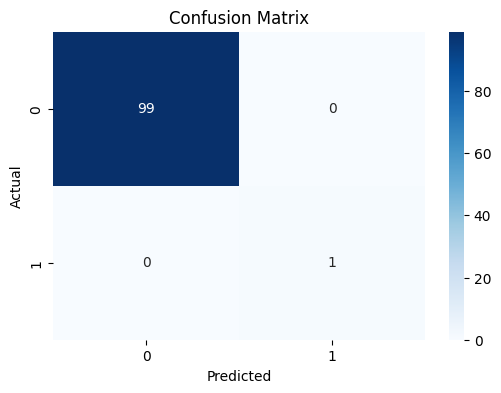

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi hasil pada data uji
y_pred = model.predict(X_test)

# Hitung akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Cetak classification report (precision, recall, f1-score)
print(classification_report(y_test, y_pred))

# Visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Dashboard

In [20]:
%%writefile app.py
import streamlit as st
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
import folium
from streamlit_folium import st_folium
from sklearn.ensemble import RandomForestClassifier

st.set_page_config(page_title="Dashboard Prediksi Banjir", layout="wide")
st.title("🗺️ Dashboard Prediksi Daerah Rawan Banjir")

st.sidebar.header("📥 Upload Data CSV")
uploaded_file = st.sidebar.file_uploader("Unggah file CSV", type=["csv"])

# Fungsi bantu untuk memuat data
def load_data_from_csv(file):
    df = pd.read_csv(file)
    required_columns = {'longitude', 'latitude', 'rainfall', 'slope', 'elevation', 'land_use'}
    if not required_columns.issubset(set(df.columns)):
        st.error(f"CSV harus memiliki kolom: {', '.join(required_columns)}")
        return None
    geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
    return gdf

# Data dummy fallback
def generate_dummy_data():
    np.random.seed(42)
    n = 500
    lat = np.random.uniform(-7.9, -7.5, n)
    lon = np.random.uniform(110.2, 110.6, n)
    coords = [Point(lon, lat) for lon, lat in zip(lon, lat)]
    rainfall = np.random.uniform(50, 300, n)
    slope = np.random.uniform(0, 45, n)
    elevation = np.random.uniform(5, 200, n)
    land_use = np.random.choice([0, 1, 2], n)
    label = ((rainfall > 200) & (elevation < 50) & (slope < 10)).astype(int)

    return gpd.GeoDataFrame({
        "rainfall": rainfall,
        "slope": slope,
        "elevation": elevation,
        "land_use": land_use,
        "flood_risk": label,
        "geometry": coords
    }, crs="EPSG:4326")

# Load data
if uploaded_file:
    gdf = load_data_from_csv(uploaded_file)
    if gdf is None:
        st.stop()
    st.success("Data berhasil dimuat.")
else:
    gdf = generate_dummy_data()
    st.info("Menampilkan data dummy. Silakan upload file CSV di sidebar untuk menggunakan data sendiri.")

# Train model
X = gdf[['rainfall', 'slope', 'elevation', 'land_use']]
y = gdf.get('flood_risk', ((gdf['rainfall'] > 200) & (gdf['elevation'] < 50) & (gdf['slope'] < 10)).astype(int))
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
gdf['predicted_risk'] = model.predict(X)

# Filter peta
st.sidebar.subheader("🧭 Filter Tampilan")
filter_risk = st.sidebar.selectbox("Tampilkan Lokasi:", ["Semua", "Hanya Rawan Banjir", "Tidak Rawan"])
if filter_risk == "Hanya Rawan Banjir":
    filtered = gdf[gdf['predicted_risk'] == 1]
elif filter_risk == "Tidak Rawan":
    filtered = gdf[gdf['predicted_risk'] == 0]
else:
    filtered = gdf

# Statistik
st.subheader("📊 Statistik Data")
st.dataframe(filtered[['rainfall', 'slope', 'elevation', 'land_use', 'predicted_risk']].describe())

# Peta interaktif
st.subheader("🌍 Peta Prediksi")
m = folium.Map(location=[-7.7, 110.4], zoom_start=10)
for _, row in filtered.iterrows():
    color = "red" if row['predicted_risk'] == 1 else "green"
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=4,
        color=color,
        fill=True,
        fill_opacity=0.6,
        popup=folium.Popup(
            f"Rainfall: {row['rainfall']:.1f} mm<br>Slope: {row['slope']:.1f}°<br>Elevation: {row['elevation']:.1f} m",
            max_width=200)
    ).add_to(m)
st_folium(m, width=700, height=500)


Overwriting app.py


In [21]:
!ngrok config add-authtoken 2yAZHE7kvFShcxuMARSDmjU5AdT_5jSBe4T3CS1NjqEzRCDwC


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [22]:
!streamlit run app.py &>/content/log.txt &
from pyngrok import ngrok
public_url = ngrok.connect("http://localhost:8501")
print(f"🌐 Streamlit app running at: {public_url}")


🌐 Streamlit app running at: NgrokTunnel: "https://bb46-34-45-59-71.ngrok-free.app" -> "http://localhost:8501"


In [7]:
!nohup streamlit run app.py > streamlit.log 2>&1 &


In [8]:
!tail -n 20 streamlit.log





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://34.45.59.71:8502

